Correlation Coefficient là chỉ số thống kê đo lường mức độ quan hệ tuyến tính giữa hai biến số, không phân biệt biến này phụ thuộc vào biến kia. hệ số tương quan có giá trị từ -1.0 đến 1.0 được tính ra lớn hơn 1.0 hoặc nhỏ hơn -1 có nghĩa là phép tính hệ số tương quan đó đang lỗi.

In [ ]:
#food.csv
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import statistics
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("food.csv")
df.head()

Saving food.csv to food.csv


,food_exp,income
0,115.22,3.69
1,135.98,4.39
2,119.34,4.75
3,114.96,6.03
4,187.05,12.47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   food_exp  40 non-null     float64
 1   income    40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


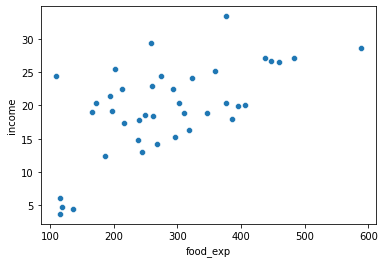

In [ ]:
sns.scatterplot(x=df['food_exp'],y=df['income'])

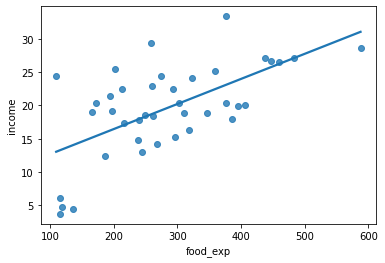

In [ ]:
sns.regplot(y="income",x="food_exp",ci=None,data=df)

+ Các biến có tương quan với nhau
+ Tính toán mối tương quan giữa X và Y để xác minh? 
  ta có: y = mx + **b**
  slope(m) = (y2-y1) / (x2 - x1) 
  với y1= 20, x1 = 300 ; y2=25,x2=500
  => slope(m) = 0.025 
  Nếu m=0.025, b=0 thì: y = 0.025*x hay income = 0.025 * food_exp

In [ ]:
import statsmodels.api as sm
X=df['income']
#dung de uoc luong them gia tri const voi gia tri 1 vao de tinh ra hang so b
X=sm.add_constant(X)
Y=df['food_exp']
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     23.79
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.95e-05
Time:                        04:31:21   Log-Likelihood:                -235.51
No. Observations:                  40   AIC:                             475.0
Df Residuals:                      38   BIC:                             478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4160     43.410      1.922      0.0

Giá trị phụ thuộc là food_exp, model OLS, số lượng giá trị data 40, R-squared 38.5% chất lượng xấp xỉ
-const đại diện giá trị b trong y= ax+b
=> food_exp= 10.2096*income+83.416


In [ ]:
#Câu 3c:


In [ ]:
#Sử dụng hàm predict để tính toán
df['predicted']= results.predict(X)
df.head()

,food_exp,income,predicted
0,115.22,3.69,121.089585
1,135.98,4.39,128.236335
2,119.34,4.75,131.911806
3,114.96,6.03,144.980149
4,187.05,12.47,210.730250


In [ ]:
#Câu 3d:
#tìm b0 và b1
results.params
#Tính dự báo dựa trên công thức sau: y= b0 + b1*x
df['predicted']= results.params[0] + results.params[1]*df['income']
df.head()

,food_exp,income,predicted
0,115.22,3.69,121.089585
1,135.98,4.39,128.236335
2,119.34,4.75,131.911806
3,114.96,6.03,144.980149
4,187.05,12.47,210.730250


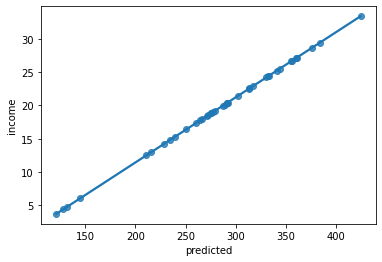

In [ ]:
#Câu 3e:
sns.regplot(y="income",x="predicted",ci=None,data=df)

In [ ]:
#Fuel_consumptions.csv 

import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import statistics
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("Fuel_Consumption.csv")
df.head()

Saving Fuel_Consumption.csv to Fuel_Consumption.csv


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df.describe
#doi qua dang de kieu float cac du lieu dang string
df = pd.get_dummies(df)
df.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ACURA,MAKE_ASTON MARTIN,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DODGE,MAKE_FIAT,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_INFINITI,MAKE_JAGUAR,MAKE_JEEP,MAKE_KIA,MAKE_LAMBORGHINI,MAKE_LAND ROVER,MAKE_LEXUS,MAKE_LINCOLN,MAKE_MASERATI,MAKE_MAZDA,MAKE_MERCEDES-BENZ,MAKE_MINI,MAKE_MITSUBISHI,MAKE_NISSAN,MAKE_PORSCHE,MAKE_RAM,MAKE_ROLLS-ROYCE,...,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,2.0,4,9.9,6.7,8.5,33,196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,2.4,4,11.2,7.7,9.6,29,221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2014,1.5,4,6.0,5.8,5.9,48,136,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,2014,3.5,6,12.7,9.1,11.1,25,255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2014,3.5,6,12.1,8.7,10.6,27,244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=df.iloc[:,:-1].values#independ
y=df.iloc[:,1].values#depend
#Chia dữ liệu train & test: 80:20.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/4,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)
y_test

array([5.5, 2.4, 2.4, 2.7, 2.5, 4.4, 2.4, 3.6, 2.4, 5. , 3.6, 6.8, 3. ,
       4.4, 1.4, 4. , 4.8, 1.6, 3.5, 6.6, 1.8, 3.5, 3.5, 2. , 2.5, 3. ,
       3.8, 5.3, 5.5, 2. , 5.6, 2.5, 3.5, 3. , 1.8, 1.6, 5.7, 2.4, 2.7,
       3.6, 1.8, 1.8, 2.4, 2. , 5.5, 2. , 2.4, 1.6, 5.3, 5.9, 4.7, 3.7,
       3.6, 1.8, 2.4, 1.6, 4.6, 1.8, 3.2, 2. , 1.6, 2.5, 2. , 5.3, 3.6,
       4.8, 5. , 3.6, 1.6, 1.4, 5.8, 3.5, 4.7, 5.3, 4.4, 2.4, 3.6, 2. ,
       2. , 2. , 1.5, 3.7, 1.8, 3.8, 4.2, 3.4, 1.4, 1.4, 5. , 6.2, 3. ,
       2. , 2. , 5. , 5.7, 5.4, 2.5, 3.5, 6.6, 3.3, 2.4, 4.8, 1.8, 1.8,
       1.6, 1.4, 2. , 3.5, 1.6, 3.6, 1.6, 2. , 3.7, 3.5, 4.7, 3.2, 5.3,
       3.5, 5.2, 1.6, 3.8, 2. , 6.2, 1. , 1.6, 4. , 3.6, 3.6, 3. , 3.5,
       3.5, 4.8, 2. , 1.5, 5.3, 5.7, 3.6, 1.8, 2.5, 2.5, 5. , 1.8, 5. ,
       5.4, 1.8, 2.5, 3. , 5.6, 5.5, 2.5, 1.6, 3.5, 1.6, 3.2, 5. , 3.6,
       4. , 2. , 6.2, 3.6, 1.6, 2. , 1.6, 3.5, 3.5, 1.6, 5. , 1.6, 5.2,
       5.3, 3.2, 3.5, 3.7, 5.7, 4. , 3.6, 3.7, 3.5, 1.6, 5. , 6.